# Tratamento de dados e implementação dos modelos
Este notebook tem como objetivo dar continuidade ao tratamento de dados que inha a ser feito no notebook anterior, assim como a implementação dos modelos, de classificação e regressão, que o nosso grupo optou por usar.  

## Import das bibliotecas necessárias

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Leitura da tabela final, agrupada no dataset anterior.

In [249]:
df2 = pd.read_csv("TABELAFINAL2.csv")
df2

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,GENDER,AGE,EMERGENCY_TIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,17050,112755,2859,NaN,M,0,20,UNKNOWN/NOT SPECIFIED,EMERGENCY,PHYS REFERRAL/NORMAL DELI,20.0276
1,896,130347,4280,"966,3893,9672,9604",F,0,24,BLACK/AFRICAN AMERICAN,NEWBORN,HMO REFERRAL/SICK,24.0684
2,12971,186975,5849,"9604,9904,9671",M,0,4,WHITE,NEWBORN,HMO REFERRAL/SICK,4.7113
3,10925,132569,51881,"9671,9604",M,19,2,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0333
4,47757,146207,2859,3893,M,19,33,HISPANIC/LATINO - DOMINICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.7694
...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,"3891,966,9604,9672",F,97,8,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,4.3681
222603,7936,102376,25000,NaN,M,98,5,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.3642
222604,21350,182608,2724,3893,M,98,7,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.3311
222605,16275,121843,42731,"966,9672",F,99,37,OTHER,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.7751


Verificação de nulls nas classes colunas da tabela.

In [250]:
df2.isnull().sum()

SUBJECT_ID                0
HADM_ID                   0
DIAGNOSES                 0
PROCEDURES            71339
GENDER                    0
AGE                       0
EMERGENCY_TIME            0
ETHNICITY                 0
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
LOS                      11
dtype: int64

Drop de linhas com NAs na coluna da label de modo a ser possivel treinar o modelo posteriormente.

In [251]:
df2 = df2.dropna(subset=['LOS'])
df2

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,GENDER,AGE,EMERGENCY_TIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,17050,112755,2859,NaN,M,0,20,UNKNOWN/NOT SPECIFIED,EMERGENCY,PHYS REFERRAL/NORMAL DELI,20.0276
1,896,130347,4280,"966,3893,9672,9604",F,0,24,BLACK/AFRICAN AMERICAN,NEWBORN,HMO REFERRAL/SICK,24.0684
2,12971,186975,5849,"9604,9904,9671",M,0,4,WHITE,NEWBORN,HMO REFERRAL/SICK,4.7113
3,10925,132569,51881,"9671,9604",M,19,2,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0333
4,47757,146207,2859,3893,M,19,33,HISPANIC/LATINO - DOMINICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.7694
...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,"3891,966,9604,9672",F,97,8,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,4.3681
222603,7936,102376,25000,NaN,M,98,5,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.3642
222604,21350,182608,2724,3893,M,98,7,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.3311
222605,16275,121843,42731,"966,9672",F,99,37,OTHER,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.7751


Definição de 0 como o procedure das pessoas que tinham esse campo vazio.

In [252]:
df2['PROCEDURES'].fillna("0", inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_3412\2688437829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['PROCEDURES'].fillna("0", inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_3412\2688437829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PROCEDURES'].fillna("0", inplace=True)


In [253]:
df2.isnull().sum()

SUBJECT_ID            0
HADM_ID               0
DIAGNOSES             0
PROCEDURES            0
GENDER                0
AGE                   0
EMERGENCY_TIME        0
ETHNICITY             0
ADMISSION_TYPE        0
ADMISSION_LOCATION    0
LOS                   0
dtype: int64

In [254]:
df2

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,GENDER,AGE,EMERGENCY_TIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,17050,112755,2859,0,M,0,20,UNKNOWN/NOT SPECIFIED,EMERGENCY,PHYS REFERRAL/NORMAL DELI,20.0276
1,896,130347,4280,"966,3893,9672,9604",F,0,24,BLACK/AFRICAN AMERICAN,NEWBORN,HMO REFERRAL/SICK,24.0684
2,12971,186975,5849,"9604,9904,9671",M,0,4,WHITE,NEWBORN,HMO REFERRAL/SICK,4.7113
3,10925,132569,51881,"9671,9604",M,19,2,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0333
4,47757,146207,2859,3893,M,19,33,HISPANIC/LATINO - DOMINICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.7694
...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,"3891,966,9604,9672",F,97,8,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,4.3681
222603,7936,102376,25000,0,M,98,5,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.3642
222604,21350,182608,2724,3893,M,98,7,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.3311
222605,16275,121843,42731,"966,9672",F,99,37,OTHER,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.7751


Criação de um dicionário de modo a mapear as etnias.

In [255]:
categorias_etnias = {
    'WHITE': 'Branco',
    'BLACK/AFRICAN AMERICAN': 'Negro',
    'OTHER': 'Outro',
    'UNKNOWN/NOT SPECIFIED': 'Desconhecido/Não Especificado',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispano',
    'HISPANIC OR LATINO': 'Hispano',
    'ASIAN - FILIPINO': 'Asiático',
    'WHITE - BRAZILIAN': 'Branco',
    'ASIAN': 'Asiático',
    'WHITE - OTHER EUROPEAN': 'Branco',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Ilhas do Pacífico',
    'MULTI RACE ETHNICITY': 'Multiétnico',
    'UNABLE TO OBTAIN': 'Não foi possível obter',
    'BLACK/AFRICAN': 'Negro',
    'HISPANIC/LATINO - SALVADORAN': 'Hispano',
    'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 'Hispano',
    'BLACK/HAITIAN': 'Negro',
    'WHITE - RUSSIAN': 'Branco',
    'ASIAN - CHINESE': 'Asiático',
    'PORTUGUESE': 'Português',
    'PATIENT DECLINED TO ANSWER': 'Paciente recusou responder',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispano',
    'BLACK/CAPE VERDEAN': 'Negro',
    'HISPANIC/LATINO - DOMINICAN': 'Hispano',
    'ASIAN - ASIAN INDIAN': 'Asiático',
    'HISPANIC/LATINO - CUBAN': 'Hispano',
    'ASIAN - VIETNAMESE': 'Asiático',
    'HISPANIC/LATINO - MEXICAN': 'Hispano',
    'ASIAN - OTHER': 'Asiático',
    'MIDDLE EASTERN': 'Oriente Médio',
    'ASIAN - KOREAN': 'Asiático',
    'ASIAN - CAMBODIAN': 'Asiático',
    'WHITE - EASTERN EUROPEAN': 'Branco',
    'SOUTH AMERICAN': 'Sul Americano',
    'AMERICAN INDIAN/ALASKA NATIVE': 'Índio Americano/Nativo do Alasca',
    'HISPANIC/LATINO - COLOMBIAN': 'Hispano',
    'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'Tribos Reconhecidas Federalmente de Índios Americanos/Nativos do Alasca',
    'CARIBBEAN ISLAND': 'Ilha do Caribe',
    'ASIAN - THAI': 'Asiático',
    'ASIAN - JAPANESE': 'Asiático',
    'HISPANIC/LATINO - HONDURAN': 'Hispano'
}

df2['ETHNICITY_GROUPED'] = df2['ETHNICITY'].map(categorias_etnias)

contagem_categorias_etnias = df2['ETHNICITY_GROUPED'].value_counts()

print(contagem_categorias_etnias)

ETHNICITY_GROUPED
Branco                                                                     153660
Negro                                                                       37055
Desconhecido/Não Especificado                                               10654
Hispano                                                                      7889
Asiático                                                                     4425
Outro                                                                        4249
Não foi possível obter                                                       2253
Paciente recusou responder                                                   1274
Português                                                                     449
Multiétnico                                                                   301
Oriente Médio                                                                 250
Índio Americano/Nativo do Alasca                                               8

C:\Users\andre\AppData\Local\Temp\ipykernel_3412\1575157612.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ETHNICITY_GROUPED'] = df2['ETHNICITY'].map(categorias_etnias)


Definição de grupos de idade, e substituição na tabela das idades pelo respectivo grupo.

In [256]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 102]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

df2['AGE_GROUP'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)

contagem_categorias_idades = df2['AGE_GROUP'].value_counts()

print(contagem_categorias_idades)

AGE_GROUP
60-69    54670
70-79    53100
80-89    41394
50-59    34106
90-99    14280
40-49    13278
30-39     7515
20-29     3984
100+       139
10-19       85
0-9         45
Name: count, dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_3412\3996553900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AGE_GROUP'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)


Foi efetuado o mesmo processo para o Emergency Time.

In [257]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 290, 310]
labels = ['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_99', '100_109', '110_119', '120_129', '130_139', '140_149','150_159', '160_169', '170_179', '180_189', '190_199', '_200+', '_300+']

df2['EMERGENCYTIME_GROUP'] = pd.cut(df2['EMERGENCY_TIME'], bins=bins, labels=labels, right=False)

contagem_categorias_emergency = df2['EMERGENCYTIME_GROUP'].value_counts()

print(contagem_categorias_emergency)

EMERGENCYTIME_GROUP
0_9        134018
10_19       56845
20_29       18049
30_39        6916
40_49        2745
50_59        1742
60_69         838
70_79         587
80_89         225
90_99         185
100_109       164
120_129        58
130_139        54
170_179        48
190_199        28
110_119        27
160_169        26
140_149        12
_200+          12
_300+           9
180_189         6
150_159         2
Name: count, dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_3412\1797752114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EMERGENCYTIME_GROUP'] = pd.cut(df2['EMERGENCY_TIME'], bins=bins, labels=labels, right=False)


Criação do intervalo do tempo de estadia dos pacientes, e respetiva substituição.

In [222]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
labels = ['0:9', '10:19', '20:29', '30:39', '40:49', '50:59', '60:69', '70:79', '80:89', '90:99', '100:109', '110:119', '120:129', '130:139', '140:149','150:159', '160:169', '170:179', '180:189']

df2['LOS_GROUPED'] = pd.cut(df2['LOS'], bins=bins, labels=labels, right=False)

contagem_categorias_emergency = df2['LOS_GROUPED'].value_counts()

print(contagem_categorias_emergency)

LOS_GROUPED
0:9        201190
10:19       14464
20:29        3992
30:39        1675
40:49         771
50:59         252
60:69         112
70:79          46
90:99          32
80:89          23
110:119        18
100:109        13
170:179         5
120:129         1
130:139         1
150:159         1
140:149         0
160:169         0
180:189         0
Name: count, dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_3412\3033228863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LOS_GROUPED'] = pd.cut(df2['LOS'], bins=bins, labels=labels, right=False)


Remoção das colunas substituídas por estas anteriores.

In [258]:
# Colunas a serem removidas
columns_to_drop = ['ETHNICITY', 'EMERGENCY_TIME', 'AGE']

# Remover as colunas
tabelafinal = df2.drop(columns=columns_to_drop)
tabelafinal

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,GENDER,ADMISSION_TYPE,ADMISSION_LOCATION,LOS,ETHNICITY_GROUPED,AGE_GROUP,EMERGENCYTIME_GROUP
0,17050,112755,2859,0,M,EMERGENCY,PHYS REFERRAL/NORMAL DELI,20.0276,Desconhecido/Não Especificado,0-9,20_29
1,896,130347,4280,"966,3893,9672,9604",F,NEWBORN,HMO REFERRAL/SICK,24.0684,Negro,0-9,20_29
2,12971,186975,5849,"9604,9904,9671",M,NEWBORN,HMO REFERRAL/SICK,4.7113,Branco,0-9,0_9
3,10925,132569,51881,"9671,9604",M,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0333,Branco,10-19,0_9
4,47757,146207,2859,3893,M,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.7694,Hispano,10-19,30_39
...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,"3891,966,9604,9672",F,EMERGENCY,CLINIC REFERRAL/PREMATURE,4.3681,Branco,90-99,0_9
222603,7936,102376,25000,0,M,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.3642,Branco,90-99,0_9
222604,21350,182608,2724,3893,M,EMERGENCY,EMERGENCY ROOM ADMIT,1.3311,Branco,90-99,0_9
222605,16275,121843,42731,"966,9672",F,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.7751,Outro,90-99,30_39


Verificação do número de nulls: como é visivel, o problema de valores ausentes foi resolvido.

In [259]:
tabelafinal.isnull().sum()

SUBJECT_ID             0
HADM_ID                0
DIAGNOSES              0
PROCEDURES             0
GENDER                 0
ADMISSION_TYPE         0
ADMISSION_LOCATION     0
LOS                    0
ETHNICITY_GROUPED      0
AGE_GROUP              0
EMERGENCYTIME_GROUP    0
dtype: int64

Verificação do tipo dos dados de cada coluna

In [260]:
for column in tabelafinal.columns:
    print(f"Column: {column} - Type of data: {tabelafinal[column].dtype}")

Column: SUBJECT_ID - Type of data: int64
Column: HADM_ID - Type of data: int64
Column: DIAGNOSES - Type of data: int64
Column: PROCEDURES - Type of data: object
Column: GENDER - Type of data: object
Column: ADMISSION_TYPE - Type of data: object
Column: ADMISSION_LOCATION - Type of data: object
Column: LOS - Type of data: float64
Column: ETHNICITY_GROUPED - Type of data: object
Column: AGE_GROUP - Type of data: category
Column: EMERGENCYTIME_GROUP - Type of data: category


Verificação do número de valores distintos em cada coluna

In [261]:
for coluna in tabelafinal.columns:
    total_distintos = tabelafinal[coluna].nunique()
    print(f"Total de valores distintos na coluna '{coluna}': {total_distintos}")

Total de valores distintos na coluna 'SUBJECT_ID': 31871
Total de valores distintos na coluna 'HADM_ID': 40524
Total de valores distintos na coluna 'DIAGNOSES': 10
Total de valores distintos na coluna 'PROCEDURES': 2699
Total de valores distintos na coluna 'GENDER': 2
Total de valores distintos na coluna 'ADMISSION_TYPE': 4
Total de valores distintos na coluna 'ADMISSION_LOCATION': 9
Total de valores distintos na coluna 'LOS': 32074
Total de valores distintos na coluna 'ETHNICITY_GROUPED': 16
Total de valores distintos na coluna 'AGE_GROUP': 11
Total de valores distintos na coluna 'EMERGENCYTIME_GROUP': 22


### Criação de colunas únicas para cada um dos valores de PROCEDURES, GENDER, ETHNICITY_GROUPED, ADMISSION_TYPE, ADMISSION_LOCATION, AGE_GROUP, ETHNICITY_GROUPED e EMERGENCYTIME_GROUP.

In [262]:
procedures_list = tabelafinal['PROCEDURES'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['PROCEDURES']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [263]:
procedures_list = tabelafinal['GENDER'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in df2.iterrows():
    procedures = str(row['GENDER']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [264]:
procedures_list = tabelafinal['ETHNICITY_GROUPED'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['ETHNICITY_GROUPED']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [265]:
procedures_list = tabelafinal['ADMISSION_TYPE'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['ADMISSION_TYPE']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [266]:
procedures_list = tabelafinal['ADMISSION_LOCATION'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0


for index, row in tabelafinal.iterrows():
    procedures = str(row['ADMISSION_LOCATION']).split(',') 
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [267]:
procedures_list = tabelafinal['AGE_GROUP'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['AGE_GROUP']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [268]:
procedures_list = tabelafinal['ETHNICITY_GROUPED'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['ETHNICITY_GROUPED']).split(',') 
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

In [269]:
procedures_list = tabelafinal['EMERGENCYTIME_GROUP'].str.split(',').explode()
unique_procedures = procedures_list.dropna().unique()

for procedure in unique_procedures:
    tabelafinal[procedure] = 0

for index, row in tabelafinal.iterrows():
    procedures = str(row['EMERGENCYTIME_GROUP']).split(',')  
    for procedure in procedures:
        if procedure in unique_procedures:  
            tabelafinal.at[index, procedure] = 1

Remoção das colunas substituídas por estas anteriores.

In [270]:
columns_to_drop = ['GENDER', 'PROCEDURES', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'AGE_GROUP', 'ETHNICITY_GROUPED', 'EMERGENCYTIME_GROUP']

tabelafinal = tabelafinal.drop(columns=columns_to_drop)
tabelafinal

,SUBJECT_ID,HADM_ID,DIAGNOSES,LOS,0,966,3893,9672,9604,9904,...,90_99,170_179,190_199,110_119,160_169,_300+,140_149,_200+,150_159,180_189
0,17050,112755,2859,20.0276,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,896,130347,4280,24.0684,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,12971,186975,5849,4.7113,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,10925,132569,51881,2.0333,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,47757,146207,2859,1.7694,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,4.3681,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
222603,7936,102376,25000,1.3642,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222604,21350,182608,2724,1.3311,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222605,16275,121843,42731,3.7751,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualização do número de valores distintos por coluna no dataset.

In [271]:
for coluna in tabelafinal.columns:
    total_distintos = tabelafinal[coluna].nunique()
    print(f"Total de valores distintos na coluna '{coluna}': {total_distintos}")

Total de valores distintos na coluna 'SUBJECT_ID': 31871
Total de valores distintos na coluna 'HADM_ID': 40524
Total de valores distintos na coluna 'DIAGNOSES': 10
Total de valores distintos na coluna 'LOS': 32074
Total de valores distintos na coluna '0': 2
Total de valores distintos na coluna '966': 2
Total de valores distintos na coluna '3893': 2
Total de valores distintos na coluna '9672': 2
Total de valores distintos na coluna '9604': 2
Total de valores distintos na coluna '9904': 2
Total de valores distintos na coluna '9671': 2
Total de valores distintos na coluna '3891': 2
Total de valores distintos na coluna '8856': 2
Total de valores distintos na coluna '3961': 2
Total de valores distintos na coluna '3615': 2
Total de valores distintos na coluna 'M': 2
Total de valores distintos na coluna 'F': 2
Total de valores distintos na coluna 'Desconhecido/Não Especificado': 2
Total de valores distintos na coluna 'Negro': 2
Total de valores distintos na coluna 'Branco': 2
Total de valores

Visualização do tipo de dados de cada coluna do dataset.

In [272]:
for column in tabelafinal.columns:
    print(f"Column: {column} - Type of data: {tabelafinal[column].dtype}")

Column: SUBJECT_ID - Type of data: int64
Column: HADM_ID - Type of data: int64
Column: DIAGNOSES - Type of data: int64
Column: LOS - Type of data: float64
Column: 0 - Type of data: int64
Column: 966 - Type of data: int64
Column: 3893 - Type of data: int64
Column: 9672 - Type of data: int64
Column: 9604 - Type of data: int64
Column: 9904 - Type of data: int64
Column: 9671 - Type of data: int64
Column: 3891 - Type of data: int64
Column: 8856 - Type of data: int64
Column: 3961 - Type of data: int64
Column: 3615 - Type of data: int64
Column: M - Type of data: int64
Column: F - Type of data: int64
Column: Desconhecido/Não Especificado - Type of data: int64
Column: Negro - Type of data: int64
Column: Branco - Type of data: int64
Column: Hispano - Type of data: int64
Column: Outro - Type of data: int64
Column: Asiático - Type of data: int64
Column: Não foi possível obter - Type of data: int64
Column: Paciente recusou responder - Type of data: int64
Column: Oriente Médio - Type of data: int64


### Distribuição por género dos 10 diagnósticos selecionados.

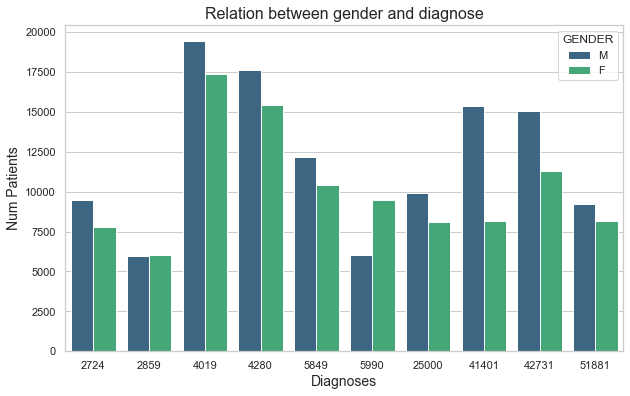

In [273]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='DIAGNOSES', hue='GENDER', data=df2, palette='viridis')

ax.set_title('Relation between gender and diagnose', fontsize=16)
ax.set_xlabel('Diagnoses', fontsize=14)
ax.set_ylabel('Num Patients', fontsize=14)

plt.show()

### A mesma distribuição, em percentagem.

<Figure size 720x432 with 0 Axes>

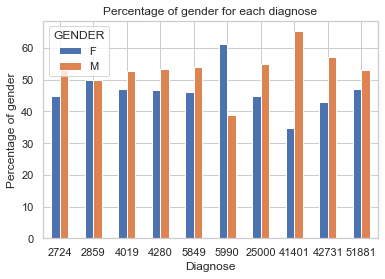

In [274]:
diagnosis_gender_count = df2.groupby(['DIAGNOSES', 'GENDER']).size().unstack(fill_value=0)

diagnosis_gender_percent = diagnosis_gender_count.div(diagnosis_gender_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
diagnosis_gender_percent.plot(kind='bar', stacked=False)

plt.title('Percentage of gender for each diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Percentage of gender')
plt.xticks(rotation=0)
plt.legend(title='GENDER')

plt.show()

## LOS e Tempo de emergência
LOS por idade:

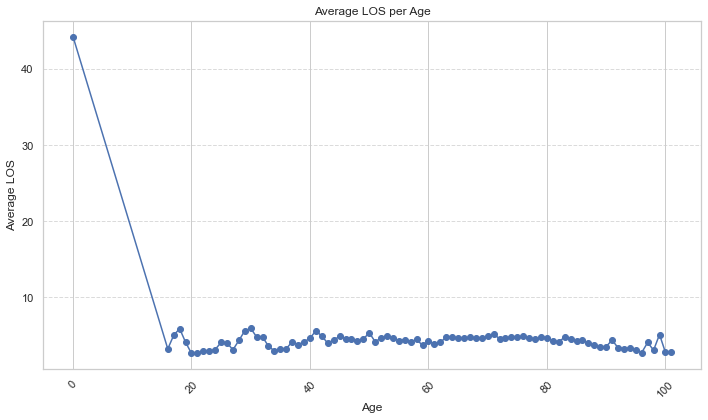

In [275]:
los_por_idade = df2.groupby('AGE')['LOS'].mean()

plt.figure(figsize=(10, 6))
plt.plot(los_por_idade, marker='o', linestyle='-')
plt.title('Average LOS per Age')
plt.xlabel('Age')
plt.ylabel('Average LOS')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [276]:
average_loss = df2['LOS'].mean()

print("Average LOS:", average_loss)

Average LOS: 4.45683635195601


Tempo de emergencia por idade:

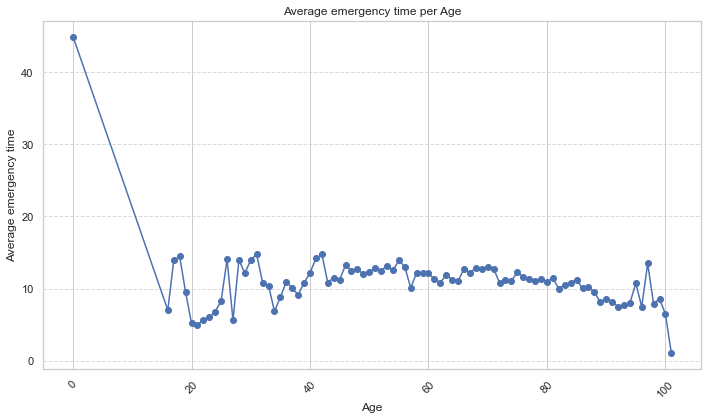

In [277]:
los_por_idade = df2.groupby('AGE')['EMERGENCY_TIME'].mean()

plt.figure(figsize=(10, 6))
plt.plot(los_por_idade, marker='o', linestyle='-')
plt.title('Average emergency time per Age')
plt.xlabel('Age')
plt.ylabel('Average emergency time')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [278]:
average_emergency = df2['EMERGENCY_TIME'].mean()

print("Average Emergency Time:", average_emergency)

Average Emergency Time: 11.340877643803124


## Matriz confusão com a correlação entre as variáveis.

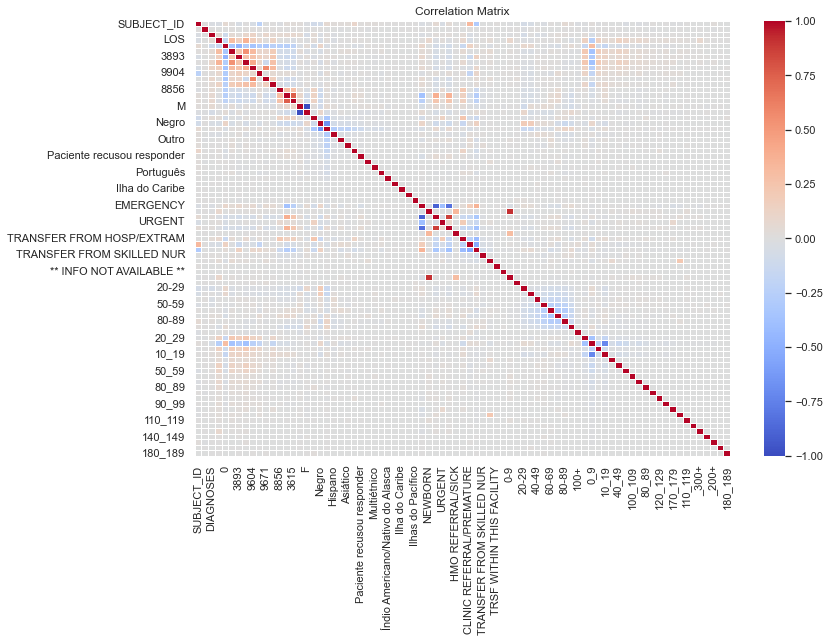

In [279]:
data_numeric = tabelafinal.select_dtypes(include=["int64", "float64"])

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Tabela final

In [280]:
tabelafinal.to_csv("tabelafinal5.csv", index=False)

In [247]:
df4=pd.read_csv("tabelafinal4.csv")
df4

,SUBJECT_ID,HADM_ID,DIAGNOSES,LOS_GROUPED,0,966,3893,9672,9604,9904,...,90_99,170_179,190_199,110_119,160_169,_300+,140_149,_200+,150_159,180_189
0,17050,112755,2859,20:29,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,896,130347,4280,20:29,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,12971,186975,5849,0:9,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,10925,132569,51881,0:9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,47757,146207,2859,0:9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222591,17122,180135,4280,0:9,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
222592,7936,102376,25000,0:9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222593,21350,182608,2724,0:9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222594,16275,121843,42731,0:9,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
df5=pd.read_csv("tabelafinal5.csv")
df5

,SUBJECT_ID,HADM_ID,DIAGNOSES,LOS,0,966,3893,9672,9604,9904,...,90_99,170_179,190_199,110_119,160_169,_300+,140_149,_200+,150_159,180_189
0,17050,112755,2859,20.0276,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,896,130347,4280,24.0684,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,12971,186975,5849,4.7113,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,10925,132569,51881,2.0333,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,47757,146207,2859,1.7694,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222591,17122,180135,4280,4.3681,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
222592,7936,102376,25000,1.3642,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222593,21350,182608,2724,1.3311,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222594,16275,121843,42731,3.7751,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelos

A abordagem que decidimos tomar baseia-se na utilização do dataset filtrado que nós fizemos, mas com uma variação entre eles, que é a presença do Length of Stay com 2 formatos diferentes, um como está no dataset filtrado, com o tempo de estadia para cada paciente, e outro com a mesma variável por intervalos de tempo. Além disso, decidimos dividir ainda mais os dados em 10 datasets distintos, cada um contendo apenas os IDs correspondentes a uma das 10 diagnoses existentes.

Apesar de sabermos que o objetivo do trabalho é trabalhar com os dados de forma não agrupada, fazendo uma regressão linear, optámos por fazer este agrupamento de modo a conseguirmos implementar modelos de classificação, pois acreditamos que com modelos de classificação poderíamos obter melhores resultados, sendo interessante a título comparativo.

O nosso grupo optou por implementar dois tipos principais de modelos: modelos de regressão e de classificação, sendo diferentes nas 2 abordagens distintas que optámos por tomar.

Nos modelos de regressão, com o LOS não agrupado, implementámos uma regressão linear e um Random Forest regressor. Nos modelos de classificação, com o LOS agrupado, implementámos uma logistic regression e um Random Forest classificator.

## Funcionamento dos modelos
**Regressão linear**: Uma regressão linear é uma técnica estatística utilizada para modelar e investigar a relação entre duas ou mais variáeis. O objetivo geralmente é descrever uma variável dependente como uma função de uma ou mais variáves independentes, geralmente com a intenção de prever ou explicar os valores da variável dependente.

**Random Forest**: O método Random Forest é uma técnica de aprendizagem computacional para regressão e classificação que opera construindo várias árvores de decisão no momento do treino e produz como output a média das previsões dessas árvores para obter uma previsão mais precisa e estável.
    



## LOS não agrupado

### Regressão Linear

### Teste

In [356]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

spark = SparkSession.builder \
    .appName("Predict LOS") \
    .getOrCreate()

df = spark.read.csv("tabelafinal5.csv", header=True, inferSchema=True)

feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS"]]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

distinct_subject_ids = df.select("SUBJECT_ID").distinct()
train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)

train_data = df.join(train_subject_ids, on="SUBJECT_ID")
test_data = df.join(test_subject_ids, on="SUBJECT_ID")

lr = LinearRegression(featuresCol="features", labelCol="LOS")

pipeline = Pipeline(stages=[assembler, lr])

model = pipeline.fit(train_data)

### Resultados

In [357]:
predictions = model.transform(test_data)

evaluator = RegressionEvaluator(labelCol="LOS", predictionCol="prediction")

r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})

results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R² Score'],
    'Values': [rmse, mse, r2]
})

print("Results:")
results

Results:


,Metric,Values
0,RMSE,5.116423
1,MSE,26.177788
2,R² Score,0.214011


### Random Forest

### Teste 

In [358]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

spark = SparkSession.builder \
    .appName("Predict LOS") \
    .getOrCreate()

df = spark.read.csv("tabelafinal5.csv", header=True, inferSchema=True)

feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS"]]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

distinct_subject_ids = df.select("SUBJECT_ID").distinct()
train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)

train_data = df.join(train_subject_ids, on="SUBJECT_ID")
test_data = df.join(test_subject_ids, on="SUBJECT_ID")

rf = RandomForestRegressor(featuresCol="features", labelCol="LOS")

pipeline = Pipeline(stages=[assembler, rf])

model = pipeline.fit(train_data)

### Resultados

In [359]:
predictions = model.transform(test_data)

evaluator = RegressionEvaluator(labelCol="LOS", predictionCol="prediction")

r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})

results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R² Score'],
    'Values': [rmse, mse, r2]
})

print("Results:")
results

Results:


,Metric,Values
0,RMSE,5.116426
1,MSE,26.177815
2,R² Score,0.214010


## LOS agrupado

### Regressão logística

### Teste

In [352]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

spark = SparkSession.builder \
    .appName("Predict LOS_GROUPED") \
    .getOrCreate()

df = spark.read.csv("tabelafinal4.csv", header=True, inferSchema=True)

indexer = StringIndexer(inputCol="LOS_GROUPED", outputCol="label")
df = indexer.fit(df).transform(df)

feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "DIAGNOSES", "LOS_GROUPED", "label"]]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

distinct_subject_ids = df.select("SUBJECT_ID").distinct()
train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)

train_data = df.join(train_subject_ids, on="SUBJECT_ID")
test_data = df.join(test_subject_ids, on="SUBJECT_ID")

lr = LogisticRegression(featuresCol="features", labelCol="label")

pipeline = Pipeline(stages=[assembler, lr])

model = pipeline.fit(train_data)

### Resultados

In [353]:
predictions = model.transform(test_data)

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)

precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)

recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)

f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = f1_evaluator.evaluate(predictions)

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Values': [accuracy, precision, recall, f1]
})

print("Results:")
results

Results:


,Metric,Values
0,Accuracy,0.908378
1,Precision,0.841021
2,Recall,0.908378
3,F1-Score,0.865403


### Random Forest

### Teste 

In [354]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

spark = SparkSession.builder \
    .appName("Predict LOS_GROUPED") \
    .getOrCreate()

df = spark.read.csv("tabelafinal4.csv", header=True, inferSchema=True)

indexer = StringIndexer(inputCol="LOS_GROUPED", outputCol="label")
df = indexer.fit(df).transform(df)

feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "DIAGNOSES", "LOS_GROUPED", "label"]]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

distinct_subject_ids = df.select("SUBJECT_ID").distinct()
train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)

train_data = df.join(train_subject_ids, on="SUBJECT_ID")
test_data = df.join(test_subject_ids, on="SUBJECT_ID")

rf = RandomForestClassifier(featuresCol="features", labelCol="label")

pipeline = Pipeline(stages=[assembler, rf])

model = pipeline.fit(train_data)

### Resultados

In [355]:
predictions = model.transform(test_data)

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)

precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)

recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)

f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = f1_evaluator.evaluate(predictions)

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Values': [accuracy, precision, recall, f1]
})

print("Results:")
results

Results:


,Metric,Values
0,Accuracy,0.908591
1,Precision,0.825538
2,Recall,0.908591
3,F1-Score,0.865076


Terminar a sessão no pyspark.

In [282]:
spark.stop()

# Dividir por diagnósticos

In [179]:
contagem_diagnoses = df5['DIAGNOSES'].value_counts()

print(contagem_diagnoses)

DIAGNOSES
4019     36834
4280     33075
42731    26385
41401    23551
5849     22599
25000    18019
51881    17355
2724     17246
5990     15524
2859     12008
Name: count, dtype: int64


In [283]:
df_diagnose = {}

diagnosticos_distintos = df5['DIAGNOSES'].unique()
for diagnostico in diagnosticos_distintos:
    df_diagnostico_atual = df5[df5['DIAGNOSES'] == diagnostico]
    
    df_diagnostico_atual = df_diagnostico_atual.drop(columns=['DIAGNOSES'])
    
    df_diagnose[diagnostico] = df_diagnostico_atual
    
    df_diagnostico_atual.to_csv(f'datasetnongrouped_{diagnostico}.csv', index=False)

Dataframe com os dados dividos por diagnóstico.

In [284]:
for diagnostico, df_diagnostico in df_diagnose.items():
    print("Diagnose", diagnostico, "\n")
    print(df_diagnose[diagnostico])

Diagnose 2859 

        SUBJECT_ID  HADM_ID      LOS  0  966  3893  9672  9604  9904  9671  \
0            17050   112755  20.0276  1    0     0     0     0     0     0   
4            47757   146207   1.7694  0    0     1     0     0     0     0   
20           11861   173048   2.3485  0    0     1     0     1     1     1   
25            3633   128191   1.9284  1    0     0     0     0     0     0   
27           11861   155206   2.7700  1    0     0     0     0     0     0   
...            ...      ...      ... ..  ...   ...   ...   ...   ...   ...   
222428        1121   181293   2.2760  0    0     0     0     0     0     0   
222439       58111   183965  11.0127  0    1     1     0     1     0     1   
222504       46287   190931   1.0420  1    0     0     0     0     0     0   
222538       24571   147475   1.5319  1    0     0     0     0     0     0   
222571        6069   130702   1.9333  1    0     0     0     0     0     0   

        ...  90_99  170_179  190_199  110_119  

In [285]:
df_diagnose = {}

diagnosticos_distintos = df4['DIAGNOSES'].unique()
for diagnostico in diagnosticos_distintos:
    df_diagnostico_atual = df4[df4['DIAGNOSES'] == diagnostico]
    
    df_diagnostico_atual = df_diagnostico_atual.drop(columns=['DIAGNOSES'])
    
    df_diagnose[diagnostico] = df_diagnostico_atual
    
    df_diagnostico_atual.to_csv(f'datasetngrouped_{diagnostico}.csv', index=False)

In [286]:
for diagnostico, df_diagnostico in df_diagnose.items():
    print("Diagnose", diagnostico, "\n")
    print(df_diagnose[diagnostico])

Diagnose 2859 

        SUBJECT_ID  HADM_ID LOS_GROUPED  0  966  3893  9672  9604  9904  9671  \
0            17050   112755       20:29  1    0     0     0     0     0     0   
4            47757   146207         0:9  0    0     1     0     0     0     0   
20           11861   173048         0:9  0    0     1     0     1     1     1   
25            3633   128191         0:9  1    0     0     0     0     0     0   
27           11861   155206         0:9  1    0     0     0     0     0     0   
...            ...      ...         ... ..  ...   ...   ...   ...   ...   ...   
222428        1121   181293         0:9  0    0     0     0     0     0     0   
222439       58111   183965       10:19  0    1     1     0     1     0     1   
222504       46287   190931         0:9  1    0     0     0     0     0     0   
222538       24571   147475         0:9  1    0     0     0     0     0     0   
222571        6069   130702         0:9  1    0     0     0     0     0     0   

        ...

## LOS não agrupado

### Regressão Linear

#### Teste

In [344]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pandas as pd

spark = SparkSession.builder \
    .appName("Predict LOS") \
    .getOrCreate()

csv_files = ["datasetnongrouped_2724.csv", "datasetnongrouped_2859.csv", "datasetnongrouped_4280.csv", 
             "datasetnongrouped_5849.csv", "datasetnongrouped_51881.csv",
             "datasetnongrouped_5990.csv", "datasetnongrouped_4019.csv", 
             "datasetnongrouped_42731.csv", "datasetnongrouped_25000.csv", "datasetnongrouped_41401.csv"]

def process_csv4(file_path):
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    
    feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS"]]
    
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    distinct_subject_ids = df.select("SUBJECT_ID").distinct()
    train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)
    
    train_data = df.join(train_subject_ids, on="SUBJECT_ID")
    test_data = df.join(test_subject_ids, on="SUBJECT_ID")
    
    lr = LinearRegression(featuresCol="features", labelCol="LOS")
    
    pipeline = Pipeline(stages=[assembler, lr])
    
    model = pipeline.fit(train_data)
    
    predictions = model.transform(test_data)
    
    evaluator = RegressionEvaluator(labelCol="LOS", predictionCol="prediction")
    
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
    
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
    
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    
    return {'file': file_path, 'RMSE': rmse, 'MSE': mse, 'R² Score': r2}

#### Resultados

In [345]:
results = [process_csv4(file) for file in csv_files]

results_df = pd.DataFrame(results)

print("Results:")
results_df

Results:


,file,RMSE,MSE,R² Score
0,datasetnongrouped_2724.csv,3.817285,14.571664,0.189344
1,datasetnongrouped_2859.csv,5.543129,30.726284,0.203391
2,datasetnongrouped_4280.csv,5.695861,32.442830,0.185667
3,datasetnongrouped_5849.csv,5.701045,32.501910,0.185992
4,datasetnongrouped_51881.csv,7.327128,53.686811,0.162343
5,datasetnongrouped_5990.csv,6.815382,46.449433,0.158541
6,datasetnongrouped_4019.csv,5.032148,25.322509,0.216307
7,datasetnongrouped_42731.csv,6.469181,41.850307,0.172067
8,datasetnongrouped_25000.csv,5.243767,27.497093,0.153357
9,datasetnongrouped_41401.csv,5.837424,34.075520,0.147118


In [346]:
average_metrics = results_df.drop(columns=['file']).mean()

print("\nAverage Scores:")
average_metrics


Average Scores:


RMSE         5.748235
MSE         33.912436
R² Score     0.177413
dtype: float64

### Random Forest

#### Teste

In [347]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pandas as pd

spark = SparkSession.builder \
    .appName("Predict LOS") \
    .getOrCreate()

csv_files = ["datasetnongrouped_2724.csv", "datasetnongrouped_2859.csv", "datasetnongrouped_4280.csv", 
             "datasetnongrouped_5849.csv", "datasetnongrouped_51881.csv",
             "datasetnongrouped_5990.csv", "datasetnongrouped_4019.csv", 
             "datasetnongrouped_42731.csv", "datasetnongrouped_25000.csv", "datasetnongrouped_41401.csv"]

def process_csv(file_path):
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    
    feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS"]]
    
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    distinct_subject_ids = df.select("SUBJECT_ID").distinct()
    train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)
    
    train_data = df.join(train_subject_ids, on="SUBJECT_ID")
    test_data = df.join(test_subject_ids, on="SUBJECT_ID")
    
    rf = RandomForestRegressor(featuresCol="features", labelCol="LOS")

    pipeline = Pipeline(stages=[assembler, rf])
    
    model = pipeline.fit(train_data)
    
    predictions = model.transform(test_data)
    
    evaluator = RegressionEvaluator(labelCol="LOS", predictionCol="prediction")
    
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
    
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
    
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    
    return {'file': file_path, 'RMSE': rmse, 'MSE': mse, 'R² Score': r2}

#### Resultados

In [348]:
results = [process_csv(file) for file in csv_files]

In [349]:
results_df = pd.DataFrame(results)

print("Results:")
results_df

Results:


,file,RMSE,MSE,R² Score
0,datasetnongrouped_2724.csv,3.803556,14.467035,0.195164
1,datasetnongrouped_2859.csv,5.556449,30.874127,0.199558
2,datasetnongrouped_4280.csv,5.682125,32.286543,0.189590
3,datasetnongrouped_5849.csv,5.730027,32.833214,0.177695
4,datasetnongrouped_51881.csv,7.294470,53.209290,0.169793
5,datasetnongrouped_5990.csv,6.778620,45.949689,0.167595
6,datasetnongrouped_4019.csv,4.974130,24.741972,0.234273
7,datasetnongrouped_42731.csv,6.474265,41.916106,0.170766
8,datasetnongrouped_25000.csv,5.266958,27.740842,0.145852
9,datasetnongrouped_41401.csv,5.817222,33.840077,0.153011


In [350]:
average_metrics = results_df.drop(columns=['file']).mean()

print("\nAverage Scores:")
average_metrics


Average Scores:


RMSE         5.737782
MSE         33.785890
R² Score     0.180330
dtype: float64

In [351]:
spark.stop()

## LOS agrupado

### Regressão logistica

#### Teste 

In [337]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pandas as pd

spark = SparkSession.builder \
    .appName("Predict LOS_GROUPED") \
    .getOrCreate()

csv_files = ["datasetngrouped_2724.csv", "datasetngrouped_2859.csv", "datasetngrouped_4280.csv", 
             "datasetngrouped_5849.csv", "datasetngrouped_51881.csv",
             "datasetngrouped_5990.csv", "datasetngrouped_4019.csv", 
             "datasetngrouped_42731.csv", "datasetngrouped_25000.csv", "datasetngrouped_41401.csv"]

def process_csv3(file_path):
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    
    feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS_GROUPED"]]
    
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    indexer = StringIndexer(inputCol="LOS_GROUPED", outputCol="label", handleInvalid="keep")
    
    distinct_subject_ids = df.select("SUBJECT_ID").distinct()
    train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)
    
    train_data = df.join(train_subject_ids, on="SUBJECT_ID")
    test_data = df.join(test_subject_ids, on="SUBJECT_ID")
    
    lr = LogisticRegression(featuresCol="features", labelCol="label")
    
    pipeline = Pipeline(stages=[assembler, indexer, lr])
    
    model = pipeline.fit(train_data)
    
    predictions = model.transform(test_data)
    
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
    
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    
    return {'file': file_path, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

#### Resultados

In [338]:
results = [process_csv3(file) for file in csv_files]

In [339]:
results_df = pd.DataFrame(results)

print("Results:")
results_df

Results:


,file,Accuracy,F1 Score,Precision,Recall
0,datasetngrouped_2724.csv,0.937264,0.907971,0.929680,0.937264
1,datasetngrouped_2859.csv,0.898818,0.858811,0.840761,0.898818
2,datasetngrouped_4280.csv,0.893385,0.847173,0.817099,0.893385
3,datasetngrouped_5849.csv,0.898558,0.854261,0.847055,0.898558
4,datasetngrouped_51881.csv,0.826907,0.756298,0.746117,0.826907
5,datasetngrouped_5990.csv,0.880577,0.828226,0.818843,0.880577
6,datasetngrouped_4019.csv,0.926441,0.894692,0.880333,0.926441
7,datasetngrouped_42731.csv,0.875737,0.826279,0.805502,0.875737
8,datasetngrouped_25000.csv,0.917587,0.881761,0.862621,0.917587
9,datasetngrouped_41401.csv,0.923473,0.894448,0.875067,0.923473


In [340]:
average_metrics = results_df.drop(columns=['file']).mean()

print("\nAverage Scores:")
average_metrics


Average Scores:


Accuracy     0.897875
F1 Score     0.854992
Precision    0.842308
Recall       0.897875
dtype: float64

### Random Forest

#### Teste

In [324]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pandas as pd

spark = SparkSession.builder \
    .appName("Predict LOS_GROUPED") \
    .getOrCreate()

csv_files = ["datasetngrouped_2724.csv", "datasetngrouped_2859.csv", "datasetngrouped_4280.csv", 
             "datasetngrouped_5849.csv", "datasetngrouped_51881.csv",
             "datasetngrouped_5990.csv", "datasetngrouped_4019.csv", 
             "datasetngrouped_42731.csv", "datasetngrouped_25000.csv", "datasetngrouped_41401.csv"]

def process_csv2(file_path):
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    
    feature_columns = [col for col in df.columns if col not in ["SUBJECT_ID", "HADM_ID", "LOS_GROUPED"]]
    
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    indexer = StringIndexer(inputCol="LOS_GROUPED", outputCol="label", handleInvalid="keep")
    
    distinct_subject_ids = df.select("SUBJECT_ID").distinct()
    train_subject_ids, test_subject_ids = distinct_subject_ids.randomSplit([0.8, 0.2], seed=1234)
    
    train_data = df.join(train_subject_ids, on="SUBJECT_ID")
    test_data = df.join(test_subject_ids, on="SUBJECT_ID")
    
    rf = RandomForestClassifier(featuresCol="features", labelCol="label")
    
    pipeline = Pipeline(stages=[assembler, indexer, rf])
    
    model = pipeline.fit(train_data)
    
    predictions = model.transform(test_data)
    
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
    
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    
    return {'file': file_path, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

#### Resultados

In [325]:
results = [process_csv2(file) for file in csv_files]

In [326]:
results_df = pd.DataFrame(results)

print("Results:")
results_df

Results:


,file,Accuracy,F1 Score,Precision,Recall
0,datasetngrouped_2724.csv,0.937264,0.906911,0.878463,0.937264
1,datasetngrouped_2859.csv,0.898345,0.850239,0.807024,0.898345
2,datasetngrouped_4280.csv,0.895596,0.846269,0.802092,0.895596
3,datasetngrouped_5849.csv,0.899304,0.851625,0.808747,0.899304
4,datasetngrouped_51881.csv,0.831410,0.754875,0.691243,0.831410
5,datasetngrouped_5990.csv,0.881919,0.826583,0.777781,0.881919
6,datasetngrouped_4019.csv,0.927925,0.893235,0.861046,0.927925
7,datasetngrouped_42731.csv,0.881213,0.825570,0.776537,0.881213
8,datasetngrouped_25000.csv,0.918126,0.878936,0.842954,0.918126
9,datasetngrouped_41401.csv,0.927998,0.893342,0.861181,0.927998


In [336]:
average_metrics = results_df.drop(columns=['file']).mean()

print("\nAverage Scores:")
average_metrics


Average Scores:


Accuracy     0.897875
F1 Score     0.854992
Precision    0.842308
Recall       0.897875
dtype: float64

In [343]:
spark.stop()

## Análise de resultados
Após a execução dos modelos obtivemos os seguintes resultados:

Para os dados não divididos por diagnóstico:

- LOS agrupado:

    - Regressão logística:
    
        Accuracy	0.908378

        Precision	0.841021

        Recall	    0.908378
        
        F1-Score	0.865403

    - Random Forest:
    
        Accuracy	0.908591

	    Precision	0.825538

	    Recall	    0.908591

	    F1-Score	0.865076

- LOS não agrupado:

    - Regressão linear:
    
        RMSE	  5.116423

        MSE	      26.177788

        R² Score 0.214011

    - Random Forest regressor:
    
        RMSE	5.116426

        MSE	26.177815

        R² Score	0.214010

Para os dados divididos por diagnóstico:

- LOS agrupado:

    - Regressão logistica:
    
        Accuracy     0.897875

        F1 Score     0.854992

        Precision    0.842308

        Recall       0.897875
            
    - Random Forest:
    
        Accuracy     0.897875

        F1 Score     0.854992

        Precision    0.842308

        Recall       0.897875

- LOS não agrupado:

    - Regressão linear:
    
        RMSE         5.748235

        MSE         33.912436

        R² Score     0.177413
    
    - Random Forest regressor:
    
        RMSE         5.737782

        MSE         33.785890

        R² Score     0.180330

Com base nestes resultados podemos inferir que os modelos estão, não estão a atingir um desempenho satisfatório. Um RMSE relativamente alto de 5.116423 sugere que as previsões do modelo estão, em média, diferindo dos tempos de permanência reais em cerca de 5.12 unidades, em uma escala que reflete o tempo de permanência dos pacientes. Além disso, o MSE de 26.177788 indica que o quadrado médio das diferenças entre as previsões e os valores reais é de aproximadamente 26.18 unidades, o que é considerável em um contexto hospitalar.

O R² Score de 0.214011 revela que apenas cerca de 21.4% da variabilidade nos tempos de permanência dos pacientes está sendo explicada pelo modelo. Isso sugere que o modelo pode não estar a capturar adequadamente os fatores que influenciam o tempo de permanência dos pacientes no hospital.


Para os resultados agregados, Os resultados indicam que o modelo de classificação para prever o "length of stay" (LOS) agrupado em intervalos está com um desempenho bastante sólido.

A precisão (Precision) de 0.841021 sugere que, quando o modelo prevê um determinado intervalo de tempo de permanência, em média, 84.1% dessas previsões são corretas. Isso é importante, pois indica que o modelo não está a cometer muitos erros ao classificar os intervalos de tempo de permanência.

O Recall de 0.908378 indica que o modelo está a capturar cerca de 90.8% dos casos positivos, ou seja, dos casos em que o tempo de permanência real pertence a um determinado intervalo, o modelo está identificando corretamente a maioria deles.

O F1-Score de 0.865403 é uma média harmônica entre precisão e recall e fornece uma medida balanceada do desempenho do modelo. Um F1-Score próximo de 1 indica um bom equilíbrio entre precisão e recall, o que sugere que o modelo está gerando previsões precisas e também capturando a maioria dos casos positivos.

A acurracy (Accuracy) de 0.908378 indica que, em média, o modelo está correto em cerca de 90.8% das previsões. Isso significa que o modelo está a conseguir classificar corretamente a maioria dos intervalos de tempo de permanência.
    